## Install neccessary packages

In [6]:
!pip install pandas seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 25.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 25.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 26.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 30.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 32.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.6 MB/s eta 0:00:00


## Import neccessary packages

In [21]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

## Load "wine" dataset from <span style="color:coral">scikit-learn</span>

In [34]:
wine_dataset = load_wine()

# Створимо зі завантажених даних датафрейм, з котрим надалі будемо працювати
wine_dataframe = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)

# Перевіримо, які дані містяться
print(wine_dataframe.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

## Clusterization

In [35]:
# Дізнаємося кількість кластерів, на які треба буде розділити вина
print(len(wine_dataset.target_names))

3


In [36]:
# Проводимо безпосередню кластеризацію
kmeans_cluster = KMeans(n_clusters=3, random_state=228)
wine_dataframe_clustered = wine_dataframe.copy()
wine_dataframe_clustered["cluster"] = kmeans_cluster.fit_predict(wine_dataframe)
print(wine_dataframe_clustered.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  cluster  
0         

## Visualization

<Axes: xlabel='pca1', ylabel='pca2'>

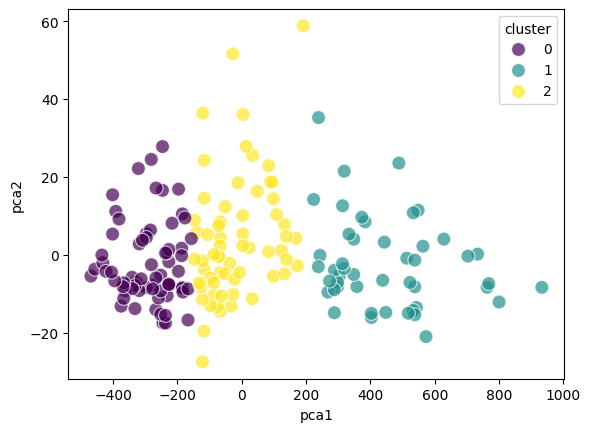

In [37]:
# Для візуалізації нам допоможе метод головних компонент, який перетворить наші дані з 13 колонок в 2
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_dataframe)
wine_dataframe_clustered_with_pca = wine_dataframe_clustered.copy()
wine_dataframe_clustered_with_pca['pca1'] = wine_pca[:, 0]
wine_dataframe_clustered_with_pca['pca2'] = wine_pca[:, 1]

# Безпосередня візуалізація
sns.scatterplot(
    data=wine_dataframe_clustered_with_pca,
    x='pca1',
    y='pca2',
    hue='cluster',
    palette='viridis',
    s=100,
    alpha=0.7
)